In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder


In [81]:
df = pd.read_csv("bank-additional-full.csv")

#NA values handling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#we notice there is not any  Null-containing columns, and now we will check for columns with "unknown"
for i in range (len(df.columns)):
  if "unknown" in df.iloc[: ,i].value_counts().index:
    print("unknown detected in colum num" , i)
  else:
    print("no unknowns detected")

no unknowns detected
unknown detected in colum num 1
unknown detected in colum num 2
unknown detected in colum num 3
unknown detected in colum num 4
unknown detected in colum num 5
unknown detected in colum num 6
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected


In [5]:
mydf = df.iloc[: ,1:7]
mydf 
#Data frame containing "unknown"

,job,marital,education,default,housing,loan
0,housemaid,married,basic.4y,no,no,no
1,services,married,high.school,unknown,no,no
2,services,married,high.school,no,yes,no
3,admin.,married,basic.6y,no,no,no
4,services,married,high.school,no,no,yes
...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no
41184,blue-collar,married,professional.course,no,no,no
41185,retired,married,university.degree,no,yes,no
41186,technician,married,professional.course,no,no,no


In [6]:
for i in range(len(mydf.columns)):
  print(mydf[df.iloc[:,i] == "unknown"])

# DataFrames that contain unknown

Empty DataFrame
Columns: [job, marital, education, default, housing, loan]
Index: []
           job   marital            education  default  housing     loan
29     unknown   married    university.degree  unknown  unknown  unknown
35     unknown   married             basic.4y  unknown      yes       no
73     unknown   married              unknown  unknown       no       no
91     unknown   married              unknown  unknown      yes       no
144    unknown  divorced          high.school  unknown      yes       no
...        ...       ...                  ...      ...      ...      ...
40370  unknown   married              unknown       no       no       no
40428  unknown   married              unknown       no      yes       no
40656  unknown  divorced              unknown  unknown      yes       no
41005  unknown   married  professional.course       no       no       no
41108  unknown   married              unknown       no       no       no

[330 rows x 6 columns]
               

In [7]:
imp = SimpleImputer(missing_values= "unknown" , strategy='most_frequent')

In [8]:
imp.fit_transform(mydf)

array([['housemaid', 'married', 'basic.4y', 'no', 'no', 'no'],
       ['services', 'married', 'high.school', 'no', 'no', 'no'],
       ['services', 'married', 'high.school', 'no', 'yes', 'no'],
       ...,
       ['retired', 'married', 'university.degree', 'no', 'yes', 'no'],
       ['technician', 'married', 'professional.course', 'no', 'no', 'no'],
       ['retired', 'married', 'professional.course', 'no', 'yes', 'no']],
      dtype=object)

In [9]:
mostfrequentdf = pd.DataFrame(imp.fit_transform(mydf))

In [10]:
#convert unknowns to Nan
num_mydf = mydf.replace( "unknown" ,'aaa')
# we replaced unknown with aaa sothat it takes always the number 0 when we use the labelencoder(beacuse it works alphabitcally)
num_mydf

,job,marital,education,default,housing,loan
0,housemaid,married,basic.4y,no,no,no
1,services,married,high.school,aaa,no,no
2,services,married,high.school,no,yes,no
3,admin.,married,basic.6y,no,no,no
4,services,married,high.school,no,no,yes
...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no
41184,blue-collar,married,professional.course,no,no,no
41185,retired,married,university.degree,no,yes,no
41186,technician,married,professional.course,no,no,no


In [11]:
#to use strategeis like median and mean we need to tranform the data into numerical data
#convert
ordc = OrdinalEncoder()
num_mydf = ordc.fit_transform(num_mydf)
num_mydf = pd.DataFrame(num_mydf)
num_mydf

,0,1,2,3,4,5
0,4.0,2.0,1.0,1.0,1.0,1.0
1,8.0,2.0,4.0,0.0,1.0,1.0
2,8.0,2.0,4.0,1.0,2.0,1.0
3,1.0,2.0,2.0,1.0,1.0,1.0
4,8.0,2.0,4.0,1.0,1.0,2.0
...,...,...,...,...,...,...
41183,6.0,2.0,6.0,1.0,2.0,1.0
41184,2.0,2.0,6.0,1.0,1.0,1.0
41185,6.0,2.0,7.0,1.0,2.0,1.0
41186,10.0,2.0,6.0,1.0,1.0,1.0


In [12]:
#to check if the Label encodin made any mistakes :

print("number of zeros after Labelencoding")
for i in range(6):
  print("col : " , i , num_mydf[i].value_counts()[0])


print("number of unknowns in original data")

for i in range(6):
  print("col : " , i , mydf.iloc[: , i].value_counts()['unknown'])


number of zeros after Labelencoding
col :  0 330
col :  1 80
col :  2 1731
col :  3 8597
col :  4 990
col :  5 990
number of unknowns in original data
col :  0 330
col :  1 80
col :  2 1731
col :  3 8597
col :  4 990
col :  5 990


In [13]:
#it works fie with median strategy ( we dont have any float values)
imp2 = SimpleImputer(missing_values= 0 , strategy= 'median')
pd.DataFrame(imp2.fit_transform(num_mydf)).iloc[: , 2].value_counts()

7.0    12168
4.0    11246
3.0     6045
6.0     5243
1.0     4176
2.0     2292
5.0       18
Name: 2, dtype: int64

In [14]:
mediandf = pd.DataFrame(imp2.fit_transform(num_mydf))
mediandf

,0,1,2,3,4,5
0,4.0,2.0,1.0,1.0,1.0,1.0
1,8.0,2.0,4.0,1.0,1.0,1.0
2,8.0,2.0,4.0,1.0,2.0,1.0
3,1.0,2.0,2.0,1.0,1.0,1.0
4,8.0,2.0,4.0,1.0,1.0,2.0
...,...,...,...,...,...,...
41183,6.0,2.0,6.0,1.0,2.0,1.0
41184,2.0,2.0,6.0,1.0,1.0,1.0
41185,6.0,2.0,7.0,1.0,2.0,1.0
41186,10.0,2.0,6.0,1.0,1.0,1.0


In [15]:
#now we revert it back to the original values(categorical values)
#revert
mediandf = pd.DataFrame(ordc.inverse_transform(mediandf))
mediandf

,0,1,2,3,4,5
0,housemaid,married,basic.4y,no,no,no
1,services,married,high.school,no,no,no
2,services,married,high.school,no,yes,no
3,admin.,married,basic.6y,no,no,no
4,services,married,high.school,no,no,yes
...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no
41184,blue-collar,married,professional.course,no,no,no
41185,retired,married,university.degree,no,yes,no
41186,technician,married,professional.course,no,no,no


In [16]:
#it works fie with median strategy ( we dont have any float values)
imp2 = SimpleImputer(missing_values= 0 , strategy= 'mean')
pd.DataFrame(imp2.fit_transform(num_mydf)).iloc[: , 2].value_counts()
meanndf = pd.DataFrame(imp2.fit_transform(num_mydf))
meanndf

,0,1,2,3,4,5
0,4.0,2.0,1.0,1.000000,1.0,1.0
1,8.0,2.0,4.0,1.000092,1.0,1.0
2,8.0,2.0,4.0,1.000000,2.0,1.0
3,1.0,2.0,2.0,1.000000,1.0,1.0
4,8.0,2.0,4.0,1.000000,1.0,2.0
...,...,...,...,...,...,...
41183,6.0,2.0,6.0,1.000000,2.0,1.0
41184,2.0,2.0,6.0,1.000000,1.0,1.0
41185,6.0,2.0,7.0,1.000000,2.0,1.0
41186,10.0,2.0,6.0,1.000000,1.0,1.0


In [17]:
#now we revert it back to the original values(categorical values)
#revert
meanndf = pd.DataFrame(ordc.inverse_transform(meanndf))
meanndf

,0,1,2,3,4,5
0,housemaid,married,basic.4y,no,no,no
1,services,married,high.school,no,no,no
2,services,married,high.school,no,yes,no
3,admin.,married,basic.6y,no,no,no
4,services,married,high.school,no,no,yes
...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no
41184,blue-collar,married,professional.course,no,no,no
41185,retired,married,university.degree,no,yes,no
41186,technician,married,professional.course,no,no,no


In [18]:
# now we have 3 Data frames with 3 differnet strategies (median , mean , most-frequent)


In [19]:
#first we drop the columns with Nan/unknowns
cutdf  = df.drop(columns=df.columns[1:7])
cutdf

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [20]:
#then we merge every dataframe with the original dataframe
mediandf = pd.concat( [cutdf , mediandf] ,  axis=1)
meanndf = pd.concat( [cutdf , meanndf] ,  axis=1)
mostfrequentdf = pd.concat( [cutdf , mostfrequentdf] ,  axis=1)


In [28]:
#finally we check if any Data frame contains unknown values
#we notice there is not any  Null-containing columns, and now we will check for columns with "unknown"
dfs = [mediandf , mostfrequentdf , meanndf]
for x in dfs:
  for i in range (len(df.columns)):
    if "unknown" in x.iloc[: ,i].value_counts().index:
      print("unknown detected in colum num" , i)
    else:
      print("no unknowns detected in col :" , i)
  print("-----------------------------")

no unknowns detected in col : 0
no unknowns detected in col : 1
no unknowns detected in col : 2
no unknowns detected in col : 3
no unknowns detected in col : 4
no unknowns detected in col : 5
no unknowns detected in col : 6
no unknowns detected in col : 7
no unknowns detected in col : 8
no unknowns detected in col : 9
no unknowns detected in col : 10
no unknowns detected in col : 11
no unknowns detected in col : 12
no unknowns detected in col : 13
no unknowns detected in col : 14
no unknowns detected in col : 15
no unknowns detected in col : 16
no unknowns detected in col : 17
no unknowns detected in col : 18
no unknowns detected in col : 19
no unknowns detected in col : 20
-----------------------------
no unknowns detected in col : 0
no unknowns detected in col : 1
no unknowns detected in col : 2
no unknowns detected in col : 3
no unknowns detected in col : 4
no unknowns detected in col : 5
no unknowns detected in col : 6
no unknowns detected in col : 7
no unknowns detected in col : 8

#outliers


In [23]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [29]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [30]:
np.mean(df)

age                 40.024060
duration           258.285010
campaign             2.567593
pdays              962.475454
previous             0.172963
emp.var.rate         0.081886
cons.price.idx      93.575664
cons.conf.idx      -40.502600
euribor3m            3.621291
nr.employed       5167.035911
dtype: float64

In [31]:
np.std(df)

age                10.421123
duration          259.276101
campaign            2.769980
pdays             186.908638
previous            0.494895
emp.var.rate        1.570941
cons.price.idx      0.578833
cons.conf.idx       4.628142
euribor3m           1.734426
nr.employed        72.250651
dtype: float64

In [32]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats 

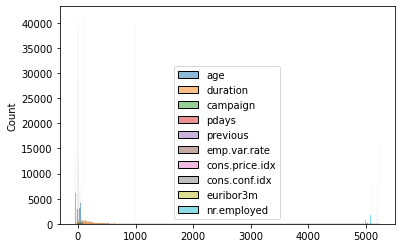

In [33]:
sns.histplot(df)
plt.show()

In [35]:

cols = []
for x in df.columns:
    if df.dtypes[x] == np.object:
        cols == cols.append(x)
cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [82]:
#convert
ordc = OrdinalEncoder()
df[cols] = ordc.fit_transform(df[cols])
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,149,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,226,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,307,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,334,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,383,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,189,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,442,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0


In [41]:
for col in df.columns:
    col_zscore = col + "_zscore"
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_zscore,job_zscore,marital_zscore,education_zscore,default_zscore,housing_zscore,loan_zscore,contact_zscore,month_zscore,day_of_week_zscore,duration_zscore,campaign_zscore,pdays_zscore,previous_zscore,poutcome_zscore,emp.var.rate_zscore,cons.price.idx_zscore,cons.conf.idx_zscore,euribor3m_zscore,nr.employed_zscore,y_zscore
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.010471,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,149,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.421501,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,226,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.124520,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.413787,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,307,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.187888,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,334,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0,3.164336,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.292025,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,2.806550
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,383,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0,0.573445,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.481012,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,-0.356309
41185,56,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,189,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0,1.533034,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,-0.267225,-0.204909,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,-0.356309
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,442,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0,0.381527,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.708569,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,2.806550


In [75]:
dfou= (abs(df.iloc[: ,21:])>3).astype(int)

In [78]:
dfou.iloc[:, 0].value_counts()


0    40819
1      369
Name: age_zscore, dtype: int64

In [77]:
dfou

,age_zscore,job_zscore,marital_zscore,education_zscore,default_zscore,housing_zscore,loan_zscore,contact_zscore,month_zscore,day_of_week_zscore,duration_zscore,campaign_zscore,pdays_zscore,previous_zscore,poutcome_zscore,emp.var.rate_zscore,cons.price.idx_zscore,cons.conf.idx_zscore,euribor3m_zscore,nr.employed_zscore,y_zscore,outlier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_zscore,job_zscore,marital_zscore,education_zscore,default_zscore,housing_zscore,loan_zscore,contact_zscore,month_zscore,day_of_week_zscore,duration_zscore,campaign_zscore,pdays_zscore,previous_zscore,poutcome_zscore,emp.var.rate_zscore,cons.price.idx_zscore,cons.conf.idx_zscore,euribor3m_zscore,nr.employed_zscore,y_zscore,outlier
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.010471,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309,0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,149,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.421501,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309,0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,226,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.124520,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309,0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.413787,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309,0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,307,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.187888,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,-0.356309,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,334,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0,3.164336,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.292025,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,2.806550,0
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,383,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0,0.573445,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.481012,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,-0.356309,0
41185,56,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,189,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0,1.533034,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,-0.267225,-0.204909,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,-0.356309,0
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,442,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0,0.381527,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.708569,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,2.806550,0


In [89]:
threshold = 5
outlier = []
for i in range(len(df.columns)):
  mean = np.mean(df.iloc[: , i])
  std = np.std(df.iloc[: , i])
  for x in df.iloc[: , i]:
      z = (x-mean)/std
      if z > threshold:
          outlier.append(x)
  #print('outlier in dataset is', outlier)
  print("outlires number in the colum :" , df.columns[i] , "is " ,  len(outlier))

outlires number in the colum : age is  4
outlires number in the colum : job is  4
outlires number in the colum : marital is  4
outlires number in the colum : education is  4
outlires number in the colum : default is  4
outlires number in the colum : housing is  4
outlires number in the colum : loan is  4
outlires number in the colum : contact is  4
outlires number in the colum : month is  4
outlires number in the colum : day_of_week is  4
outlires number in the colum : duration is  181
outlires number in the colum : campaign is  485
outlires number in the colum : pdays is  485
outlires number in the colum : previous is  795
outlires number in the colum : poutcome is  795
outlires number in the colum : emp.var.rate is  795
outlires number in the colum : cons.price.idx is  795
outlires number in the colum : cons.conf.idx is  795
outlires number in the colum : euribor3m is  795
outlires number in the colum : nr.employed is  795
outlires number in the colum : y is  795


In [90]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,149,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,226,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,307,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,334,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,383,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,189,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,442,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0


In [109]:
data = df["duration"]

In [110]:
data

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

In [111]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 861
Non-outlier observations: 40327
